## Домашная работа №5

Георгий Семенов

In [1]:
!git clone https://github.com/gvsem/formal-lang-course.git && cp -a ./formal-lang-course/. ./ && git checkout hw5
!pip install -r requirements.txt > /dev/null

Cloning into 'formal-lang-course'...
remote: Enumerating objects: 904, done.
remote: Counting objects: 100% (286/286), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 904 (delta 148), reused 218 (delta 115), pack-reused 618
Receiving objects: 100% (904/904), 2.38 MiB | 9.81 MiB/s, done.
Resolving deltas: 100% (484/484), done.
Branch 'hw5' set up to track remote branch 'hw5' from 'origin'.
Switched to a new branch 'hw5'
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.25.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [2]:
from project.automata import *
from project.automaton import *
from project.graphutils import *

import sources directory


## Постановка задачи

**Цель:** исследовать производительность реализаций алгоритмов для регулярных запросов и для задачи достижимости с регулярными ограничениями.

**Задачи:**
- Выбрать набор графов для эксперимента и обосновать выбор
- Составить набор регулярных запросов к каждому графу и сгенерировать наборы стартовых вершин
- Произвести замеры времени работы алгоритмов на разных графах и регулярных запросах
- Проанализировать полученные данные и сформулировать результаты эксперимента

**Проблемные вопросы:**
- Какое представление разреженных матриц и векторов лучше подходит для каждой из решаемых задач?
- Начиная с какого размера стартового множества выгоднее решать задачу для всех пар и выбирать нужные?

## Описание исследуемых решений

В рамках предыдущих заданий было реализовано два алгоритма, возвращающие подмножества $Q_S \times Q_F$:

- `paths_ends` выполняет регулярные запросы к графам по регулярному выражению (с помощью пересечения автоматов и транзитивного замыкания в графе); на вход принимается подмножество стартовых и финальных вершин

- `reachability_with_constraints` решает задачу достижимости с регулярными ограничениями (с помощью BFS и умножения матриц); стартовыми и финальными являются все состояния автомата

Оба алгоритма используют умножение матриц, и интерес представляет сравнение эффективности при решении частной задачи (`paths_ends`) и решения более общей задачи (`reachibility_with_constraints`).

## Описание набора данных для экспериментов

### Графы

- `wc` (332 вершины, 269 ребер, метки `a` и `d`)

- `pr` (815 вершин, 692 ребер, метки `a` и `d`)

- `wine` (733 вершин, 1839 ребер, метки `type`, `rest`, `first`, `onProperty`, `subClassOf`, `hasValue` ...)

- `core` (1323 вершины, 2752 ребер, метки `type`, `isDefinedBy`, `label`, `comment`, `first`, `rest` ...)

- `pathways` (6238 вершины, 12363 ребра, метки `type`, `subClassOf`, `label`, `narrower`)

Набор графов выбран таким, чтобы в нем содержались графы предположительно разных топологий, предметных областей и размеров.

### Запросы

Для графов `wc` и `pr` были использованы запросы:

- `a* (d | a)+ a*`
- `(a | d)* a`
- `a (a d | d a)*`
- `d (d a | a d)*`

Для графов `wine`, `core`, `pathways` использованы запросы из примера в задании (+ новый четвертый), где `l1`, `l2` ... соответствуют меткам, описанным выше, в том же порядке.

- `(l1 | l2)* l3`
- `(l3 | l4)+ l1*`
- `l1 l2 l3 (l4 | l1)*`
- `l1* | (l2 l3) | l4*`

## Описание эксперимента

### Оборудование

Измерения времени производились в среде Google Colab, характеристики процессора:

In [ ]:
!cat /proc/cpuinfo | grep -e cpu -e cache -e flags -e model

cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
cpu MHz		: 2199.998
cache size	: 56320 KB
cpu cores	: 1
cpuid level	: 13
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
cache_alignment	: 64
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
cpu MHz		: 2199.998
cache size	: 56320 KB
cpu cores	: 1
cpuid level	: 13
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush

Характеристики памяти RAM (в простое):

In [ ]:
!cat /proc/meminfo | grep -e Mem

MemTotal:       13290480 kB
MemFree:         8742012 kB
MemAvailable:   12376132 kB


### Что и как замерялось, как эти измерения должны помочь ответить на поставленные вопросы

## Какая матрица работает быстрее?

Опишем вспомогательные функции для подготовки данных, обертку для замера времени, а также графы и регулярные запросы к ним. В качестве различных разреженных матриц будем исследовать `csr`, `dok`, `lil`, `csc`

In [21]:
import time

def executor(method, matrix_class, matrix_class_id):
  def exec(fa, fa_constraint):
    start_time = time.time()
    method(fa, fa_constraint, matrix_class=matrix_class, matrix_class_id=matrix_class_id)
    finish_time = time.time()
    return finish_time - start_time
  return exec

In [106]:
from cfpq_data import *
from copy import deepcopy
import random
from pyformlang.regular_expression import Regex

seed = 42

requests = {
    "wc" : ["a* (d | a)+ a*", "(a | d)* a", "a (a d | d a)*", "d (d a | a d)*"],
    "pr" : ["a* (d | a)+ a*", "(a | d)* a", "a (a d | d a)*", "d (d a | a d)*"],
    "wine" : ["(type | rest)* first", "(first | onProperty)+ type*", "type rest first (onProperty | type)*", "type* | (rest first) | onProperty*"],
    "core" : ["(type | isDefinedBy)* label", "(label | comment)+ type*", "type isDefinedBy label (comment | type)*", "type* | (isDefinedBy label) | comment*"],
    "pathways" : ["(type | subClassOf)* label", "(label | narrower)+ type*", "type subClassOf label (narrower | type)*", "type* | (subClassOf label) | narrower*"]
}

from scipy.sparse import csr_matrix, dok_matrix, lil_matrix, csc_matrix
matrixes = {
    "csr": csr_matrix,
    "dok": dok_matrix,
    "lil": lil_matrix,
    "csc": csc_matrix
}

graph_ids = requests.keys()
graphs = {id : cfpq_data.graph_from_csv(cfpq_data.download(id)) for id in graph_ids}

def prepare_test_cases(graph_id, number_of_sf_sets=25, percentage=None):
  graph = graphs[graph_id]
  sfs = [(
          set(cfpq_data.generate_multiple_source(graph, 10 if percentage is None else int(percentage * len(graph.nodes)), seed=seed)),
          set(random.choices(list(graph.nodes().keys()), k=random.randint(1, len(graph.nodes))))
        ) for _ in range(number_of_sf_sets)]
  fas = [FiniteAutomaton(graph_to_nfa(deepcopy(graph), deepcopy(sf[0]), deepcopy(sf[1]))) for sf in sfs]
  constraint_fas = {query : FiniteAutomaton(regex_to_dfa(query)) for query in requests[graph_id]}
  return (fas, constraint_fas)

 Наблюдение показало, что метод `reachibility_with_constraints` из-за умножения матриц отрабатывает многократно дольше и поэтому для первоначального анализа был произведен замер на самом маленьком графе `wc` на лишь одном множестве из 10 стартовых вершин и случайного количества конечных.

In [31]:
measurements = {graph_id : dict() for graph_id in graph_ids}

for graph_id in ['wc']:
  fas, constraint_fas = prepare_test_cases(graph_id, 1)
  for query, constraint_fa in constraint_fas.items():
    measurements[graph_id][query] = dict()
    for matrix_class_id, matrix_class in matrixes.items():
      e1 = executor(reachability_with_constraints_transitive, matrix_class, matrix_class_id)
      e2 = executor(reachability_with_constraints, matrix_class, matrix_class_id)

      r1 = [e1(fa, constraint_fa) for fa in fas]
      r2 = [e2(fa, constraint_fa) for fa in fas]

      measurements[graph_id][query][matrix_class_id] = (r1, r2)

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:134: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:134: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


In [32]:
import pickle
with open('m1', 'wb') as handle:
    pickle.dump(measurements, handle, protocol=pickle.HIGHEST_PROTOCOL)

Посмотрим сводные диаграммы по типам матриц, на которых работали алгоритмы.

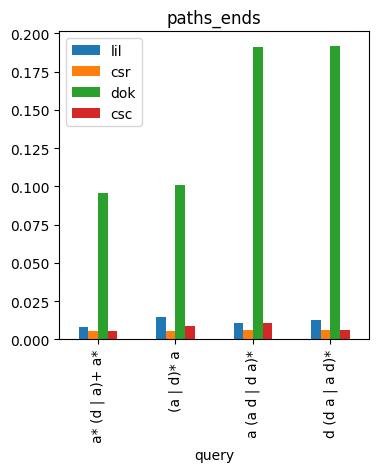

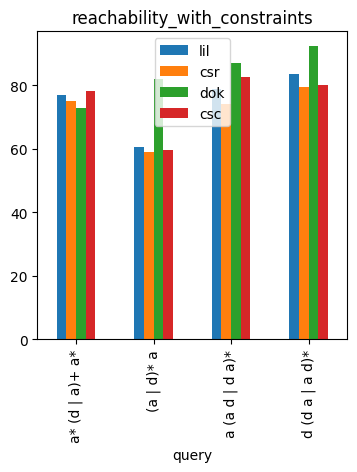

In [81]:
import pandas as pd
data = []
data1 = []
data2 = []
for x, a in measurements.items():
  for y, b in a.items():
    data1.append((y, b['lil'][0][0], b['csr'][0][0], b['dok'][0][0], b['csc'][0][0]))
    data2.append((y, b['lil'][1][0], b['csr'][1][0], b['dok'][1][0], b['csc'][1][0]))
    for z, c in b.items():
      data.append((y, z, c[0][0], c[1][0]))

data = pd.DataFrame.from_dict(data)
data1 = pd.DataFrame(data1, columns=['query', 'lil', 'csr', 'dok', 'csc'])
data2 = pd.DataFrame(data2, columns=['query', 'lil', 'csr', 'dok', 'csc'])

import pandas as pd
import matplotlib.pyplot as plt

data1.plot(x=0, y=[1, 2, 3, 4],
        kind="bar", figsize=(4, 4), title='paths_ends')

data2.plot(x=0, y=[1, 2, 3, 4],
        kind="bar", figsize=(4, 4), title='reachability_with_constraints')

# Display plot
plt.show()

Ожидаемо, второй алгоритм на BFS работает неприемлемо большое время, и дальнейший анализ для выбора наиболее эффективного типа матрицы представляется невозможным. Мы можем сделать предварительный вывод, что на том ограниченном множестве примеров, на которых мы запустили этот алгоритм, лучший результат показывает `csr` представление матрицы.

Для первого алгоритма на основе пересечений же представляется возможным более точный анализ с целью выбора наилучшего типа матриц.

In [ ]:
measurements = []

for graph_id in graph_ids:
  fas, constraint_fas = prepare_test_cases(graph_id, 25)
  for query, constraint_fa in constraint_fas.items():
    ms = []
    for matrix_class_id, matrix_class in matrixes.items():
      e1 = executor(reachability_with_constraints_transitive, matrix_class, matrix_class_id)
      r1 = [e1(fa, constraint_fa) for fa in fas]
      ms.append(r1)

    measurements.append((graph_id, query, matrix_class_id, *ms))

In [83]:
import pickle
with open('m2', 'wb') as handle:
    pickle.dump(measurements, handle, protocol=pickle.HIGHEST_PROTOCOL)

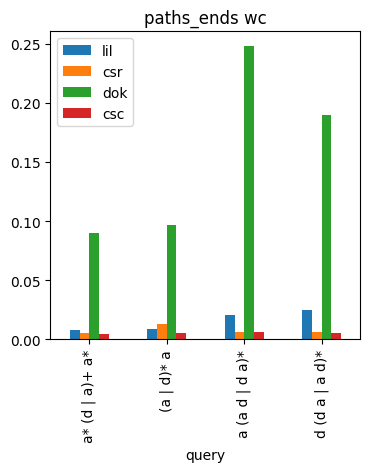

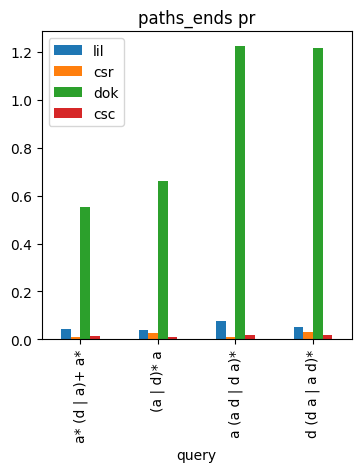

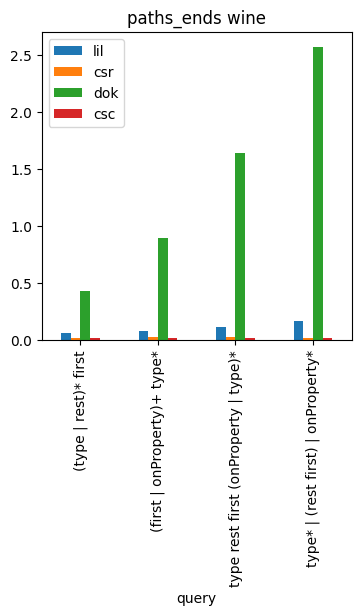

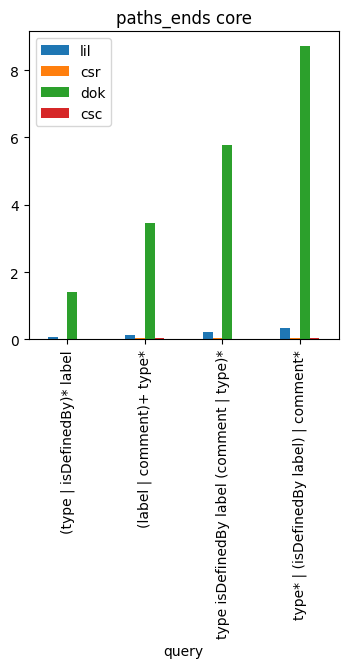

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

def mean(xs):
  return sum(xs) / len(xs)

data = {'wc' : [], 'pr' : [], 'wine' : [], 'core' : []}
for x in measurements:
  lil = x[3 + 2]
  csr = x[3 + 0]
  dok = x[3 + 1]
  csc = x[3 + 3]
  if x[0] in data:
    data[x[0]].append((x[1], mean(lil), mean(csr), mean(dok), mean(csc)))

for graph_id, data1 in data.items():
  data1 = pd.DataFrame(data1, columns=['query', 'lil', 'csr', 'dok', 'csc'])
  data1.plot(x=0, y=[1, 2, 3, 4],
          kind="bar", figsize=(4, 4), title='paths_ends ' + str(graph_id))

  # Display plot
  plt.show()

Из графиков, построенных для различных графов, мы можем сделать вывод, что наиболее подходящими для алгоритмов являются `csr` и `csc` разреженные представления матриц, поскольку для графов разных размеров и топологий, а также на разных множествах стартовых вершин и регулярных запросах они дают наилучшую производительность.

## Когда целесообразно использовать каждый из алгоритмов?

Давайте рассмотрим два графа `wc` и `wine` и позапускаем на них тензорный алгоритм на разных долях стартовых вершин.


In [107]:
measurements = []
e1 = executor(reachability_with_constraints_transitive, csr_matrix, 'csr')

for graph_id in ['wc', 'wine']:
  for perc in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    fas, constraint_fas = prepare_test_cases(graph_id, 20, percentage=perc)
    for query, constraint_fa in constraint_fas.items():

      r1 = [e1(fa, constraint_fa) for fa in fas]
      measurements.append((graph_id, query, perc, r1))

In [108]:
import pickle
with open('m3', 'wb') as handle:
    pickle.dump(measurements, handle, protocol=pickle.HIGHEST_PROTOCOL)

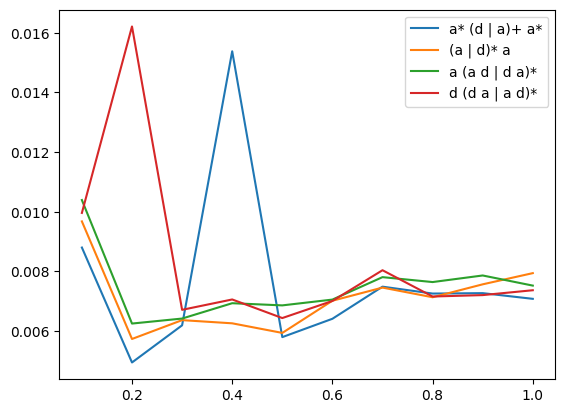

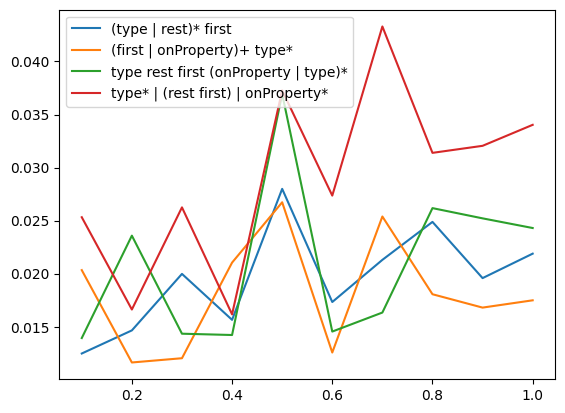

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

def mean(xs):
  return sum(xs) / len(xs)

data = {'wc' : {x : [] for x in requests['wc']}, 'wine' : {x : [] for x in requests['wine']}}
for x in measurements:
  if x[0] in data:
    data[x[0]][x[1]].append((x[2], mean(x[3])))

for graph_id, data1_ in data.items():
  plt.clf()
  plt.cla()
  for query, data1 in data1_.items():
    d = list(zip(*data1))
    plt.plot(d[0], d[1], label=query)

  plt.legend()
  plt.show()


Мы можем видеть некоторый монотонный характер зависимости времени работы алгоритма от доли стартовых вершин, поданных ему на вход. Однако время работы тензорного алгоритма не может сравниться со временем работы BFS-алгоритма, поэтому, пожалуй, из результатов эксперимента следует, что применение тензорного алгоритма всегда оправдано.

## Результаты экспериментов
### Графики, таблицы

см. выше

## Анализ результатов экспериментов
### Ответы на поставленные вопросы, аргументация ответов

1. Наиболее подходящий тип матриц для задач

Тензорный алгоритм лучше всего работает на `csr` и `csc`-матрицах.

BFS-алгоритм из-за своего времени работы не был тщательно исследован, однако из проведенных замеров ясно, что наиболее подходящей является `csr`-матрица.

Это объясняется тем, что `csr` наилучшим образом подходит для произведения матриц.

2. Целесообразность использования того или иного алгоритма при доле количества вершин

Целесообразно начать анализ графа с запуска тензорного алгоритма, поскольку время работы вне зависимости от доли стартовых вершин несоразмерно мало по сравнению с BFS-вариантом, который показывает низкую производительность.

## Выводы

В рамках экспериментального задания был проведен анализ производительности реализаций двух алгоритмов с целью нахождения наиболее подходящего типа матриц для реализаций, а также с целью установления практической целесообразности использования того или иного алгоритма.